### Simulation

In [1]:
from bmc.simulate import simulate
import numpy as np
import matplotlib.pyplot as plt

In [2]:
low = -20e-6
high = 20e-6 
n_iso = 1000
mean = (low + high) / 2
std_dev = (high - low) / 6 

z_pos = np.random.normal(loc=mean, scale=std_dev, size=n_iso)
z_pos = np.append(z_pos, 0)
z_pos = np.clip(z_pos, low, high)
z_pos = np.sort(z_pos)

# plt.plot(z_pos, 'o')

np.where(z_pos == 0)[0][0]


496

In [3]:
seq_path_gauss = 'seq_lib/normal_STE.seq'
config_path = 'sim_lib/config_1pool.yaml'

adc_time = .2
retun_zmag = False
show_plot = False
write_all_mag = True
webhook = True
plt_range = [0, 4]
iso_select = [-5,0,5]

In [4]:
sim = simulate(config_file=config_path, 
                   seq_file=seq_path_gauss, 
                   adc_time=adc_time,
                   z_positions=z_pos,
                   return_zmag=retun_zmag,
                   iso_select=iso_select,
                   show_plot=show_plot,
                   write_all_mag=write_all_mag,
                   webhook=webhook,
                   plt_range=plt_range)  # simulation mac

BMCTool simulation: 100%|██████████| 6/6 [00:12<00:00,  2.02s/it]


['rf at 0.0000s', 'delay at 0.0100s', 'rf at 0.0350s', 'delay at 0.0451s', 'rf at 0.0951s', 'adc at 0.1051s']
[]


/Users/danielmiksch/JupyterLab/optim/bmc/utils/eval.py:303: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


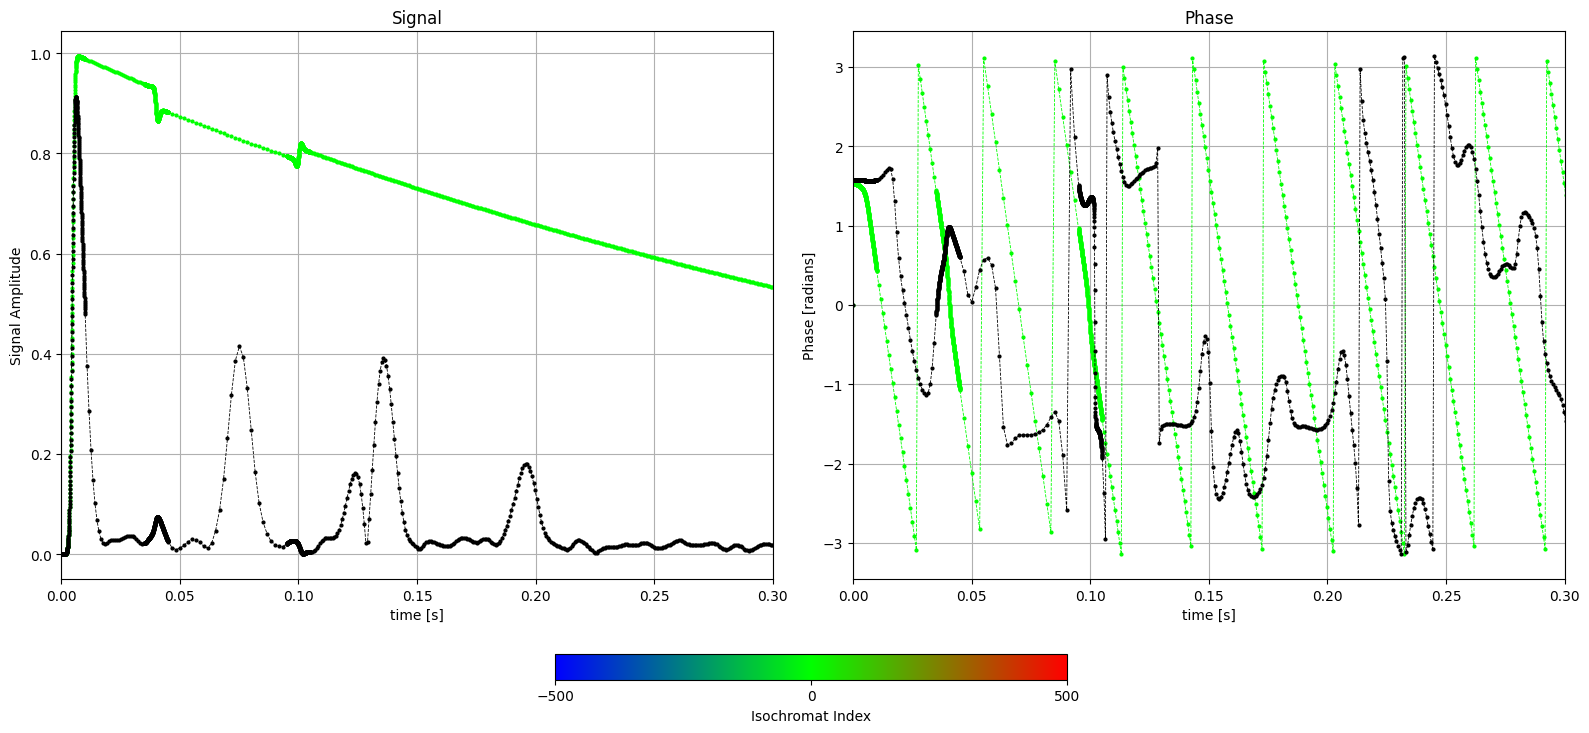

In [5]:
from bmc.utils.eval import plot_sim
time, m_z, m_z_total, m_c, m_c_total = sim.get_mag()

iso_select = [-2000, 0, 1000]
plt_range = [0.0, .3]

# _ = plot_sim(m_out=[m_z, m_z_total], time=time, plt_range=plt_range, iso_select=iso_select)
_ = plot_sim(m_out=[m_c, m_c_total], time=time, plt_range=plt_range, iso_select=iso_select)



### Animation

In [6]:
run_time = .1
track_path = True
ie = False
timing = False
total_mag = False
kwargs = {'quality': '-ql', 'write': '--write_to_movie'}  #--write_to_movie

In [7]:
# sim.animate(run_time=run_time, 
#             track_path=track_path, 
#             ie=ie, 
#             timing=timing,
#             total_mag=total_mag, 
#             **kwargs)